In [3]:
### Original distance tracking function. Unused ###
### Tracks distance to central halo present day position ###

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sys
sys.path.append("../research2017/ELVIS_HALO_Catalogs/IsolatedCatalogs")
sys.path.append("../research2017/ELVIS_Main_Branches/IsolatedTrees")
import analogsFunction as log

def indexDistLogs1(system):
    #Determine rows where distance-analogs occur
    logs=log.distAnalogsList('../ELVIS_HALO_Catalogs/IsolatedCatalogs/'+system+'.txt') #get list of analogs
    dataID=np.genfromtxt('../ELVIS_Main_Branches/IsolatedTrees/'+system+'/ID.txt');#get id data of evolutionary track
    sele=np.in1d(dataID[:,0],logs[:,0]) #intersection of analogs and whole data
    index=np.where(sele) #create list of rows where analogs occur
    return index

def distTrack1(dataX,dataY,dataZ,dataScale,n,system):
    #This function creates an array of the position vs. time of a specific distance-analog (n) in a given system.
    #Notice you have to load position data first
    dist0X=np.ones(dataX[0].shape[0])*dataX[0,0]#creates array of the central halo present X position
    dist0Y=np.ones(dataY[0].shape[0])*dataY[0,0]#creates array of the central halo present Y position
    dist0Z=np.ones(dataZ[0].shape[0])*dataZ[0,0]#creates array of the central halo present Z position
    xDistArray=np.multiply((dist0X-dataX[n]),(dist0X-dataX[n])); #x^2=(x1-x2)^2
    yDistArray=np.multiply((dist0Y-dataY[n]),(dist0Y-dataY[n])); #y^2=(y1-y2)^2
    zDistArray=np.multiply((dist0Z-dataZ[n]),(dist0Z-dataZ[n])); #z^2=(z1-z2)^2
    distArray=np.sqrt(xDistArray+yDistArray+zDistArray) #Distance formula dist=sqrt(x^2+y^2+z^2)
    a=np.vstack((dataScale[n],distArray))
    return a

def plotTrack1(system):
    #Creates plot of position vs. time for all distance-analogs in a system.
    indexList=indexDistLogs1(system); #get rows where distance-analogs occur
    dataX=np.genfromtxt("../ELVIS_Main_Branches/IsolatedTrees/"+system+"/X.txt");#get data of X position
    dataY=np.genfromtxt("../ELVIS_Main_Branches/IsolatedTrees/"+system+"/Y.txt");#get data of Y position
    dataZ=np.genfromtxt("../ELVIS_Main_Branches/IsolatedTrees/"+system+"/Z.txt");#get data of Z position
    dataScale=np.genfromtxt("../ELVIS_Main_Branches/IsolatedTrees/"+system+"/scale.txt"); #get data of scale factor
    fig1=plt.figure();
    axes=plt.gca()
    for i in indexList[0][:]:
        array=distTrack1(dataX,dataY,dataZ,dataScale,i,system)
        axes.plot(array[0],array[1],'.')
    axes.set_title("Distance tracking for"+" "+system+" "+"distance-analogs");
    axes.set_xlabel("Scale Factor");
    axes.set_ylabel("Distance (Mpc)");   
    axes.set_ylim([0,8]); 
    plt.show()

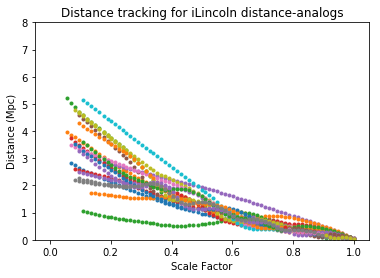

In [4]:
plotTrack1('iLincoln')